# Simulation3

**Mengqi Liu**

**Jul 06, 2023**
___

## Recap

 - $N$: number of samples one time.
 - $M$: number of bins.
 - H0: $X\perp \!\!\! \perp Y \mid Z$, H1: $X\not \! \perp \!\!\! \perp Y \mid Z$
 - Methods:
   - "Cor_kernel" is the method put forward in "Local permutation tests for conditional independence" and I revised it a little bit to make it suitable for continuous $X,Y,Z$ according to page 20 of "Minimax Optimal Conditional Independence Testing"(which is also one of cited paper of the former).
   - "Linear_reg_y": regress $Y$ on $X,Z$ and take the *absolute* coefficient of $X$ as the test statistic.
   - "Linear_reg_x": regress $X$ on $Y,Z$ and take the *absolute* coefficient of $Y$ as the test statistic.
   - "Double_reg": regress $Y$ on $Z$ and regress $X$ on $Z$ separately. Take the *absolute* correlation between residuals from two linear regressions as the test statistic.
   - "double_Cor_kernel": double-binning method (each bin will be divided into $sub$ bins).
   - "Linear_reg_y_sub", "Linear_reg_x_sub", "Double_reg_sub": conduct "Linear_reg_y", "Linear_reg_x" and "Double_reg" with permutation in sub-partitions.


- $\alpha=0.05$

- $X = f_x(Z) + \epsilon$, $Y = f_y(Z) + \epsilon$

- Noise $\epsilon$:
  - H0
    - normal: $N(Z, 1)$
    - normal_large: $N(Z, 10)$
    - normal_small: $N(Z, 0.1)$
    - chi: $\chi^2(\lceil Z \rceil))$
    - t: $t(5)$
    - exp: $\textrm{exp}(1)$
    - uni: $\textrm{Unif}([-1, +1])$
    - poi: $\textrm{Poisson}(2)$
    - skewed_normal: $N(0, 2)$, skewness=$-5$
    - skewed_t: std_dev = $2$, loc = $0$, skewness = $5$
  - H1
    - normal: $N\left([0, 0], \begin{pmatrix}
        1 & 0.5 \\
        0.5 & 1 \\
    \end{pmatrix}\right)$
    - normal_large: $N\left([0, 0], \begin{pmatrix}
        10 & 5 \\
        5 & 10 \\
    \end{pmatrix}\right)$
    - normal_small: $N\left([0, 0], \begin{pmatrix}
        0.1 & 0.05 \\
        0.05 & 0.1 \\
    \end{pmatrix}\right)$
    - skewed_normal: $N\left([0, 0], \begin{pmatrix}
        1 & 0.5 \\
        0.5 & 1 \\
    \end{pmatrix}\right)$, skewness = $[5, -5]$

- $N=100, Z\sim \textrm{Unif}([0,10))$, $M \in \{2, 4, 6, 10, 25\}$.




## Double-binning gains

 - better type-I error control with lower power

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

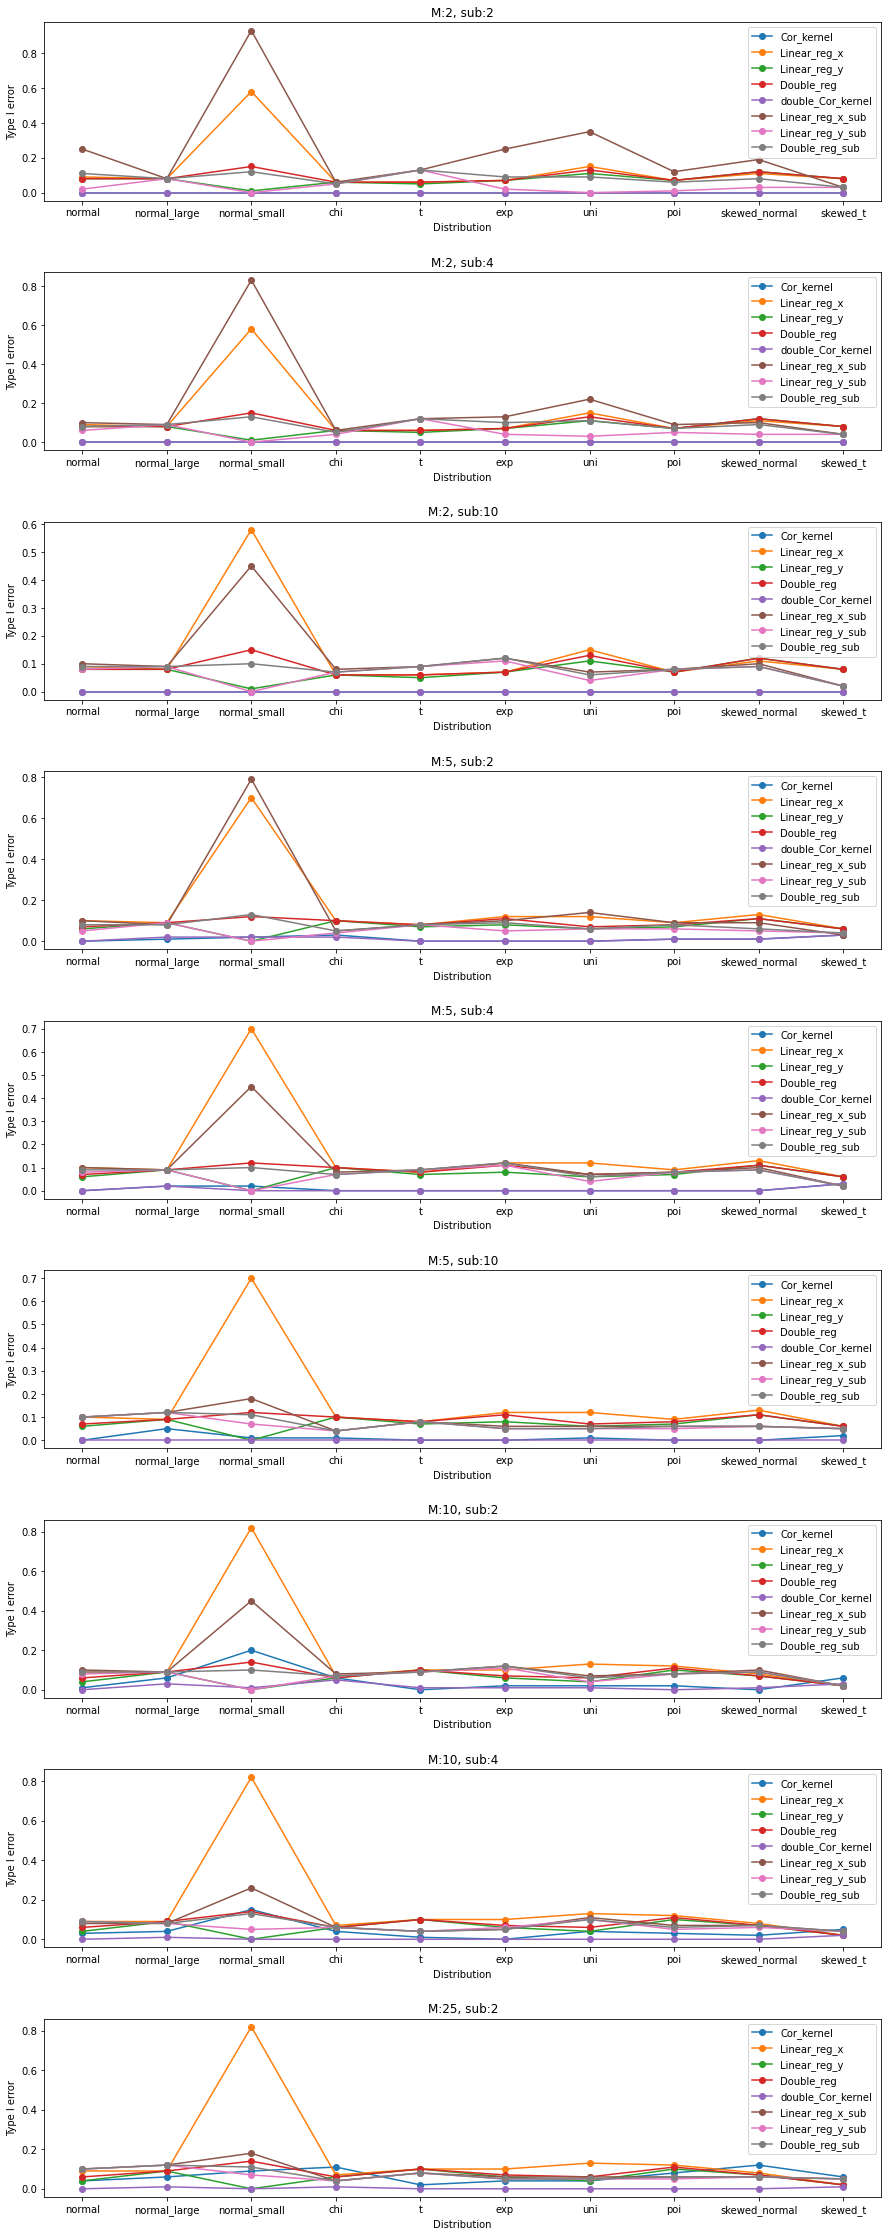

In [141]:
Ms = [2, 5, 10, 25]
plt.figure(figsize=(15,40))
plt.subplots_adjust(wspace=.4, hspace=.4)
t = 0
for m in range(len(Ms)):
    if Ms[m] <= 5:
        subs = [2, 4, 10]
    elif Ms[m] < 25:
        subs = [2, 4]
    else:
        subs=[2]
    for sub in subs:
        t += 1
        plt.subplot(9, 1, t)
        result = pd.read_csv("./results/result_sub/result_h0_M_"+str(Ms[m])+"_sub_"+str(sub)+".csv", index_col=0)
        plt.plot(result.T, '-o')
        plt.xlabel("Distribution")
        plt.ylabel("Type I error")
        plt.legend(result.index)
        plt.title("M:"+str(Ms[m])+", sub:"+str(sub))
plt.show()

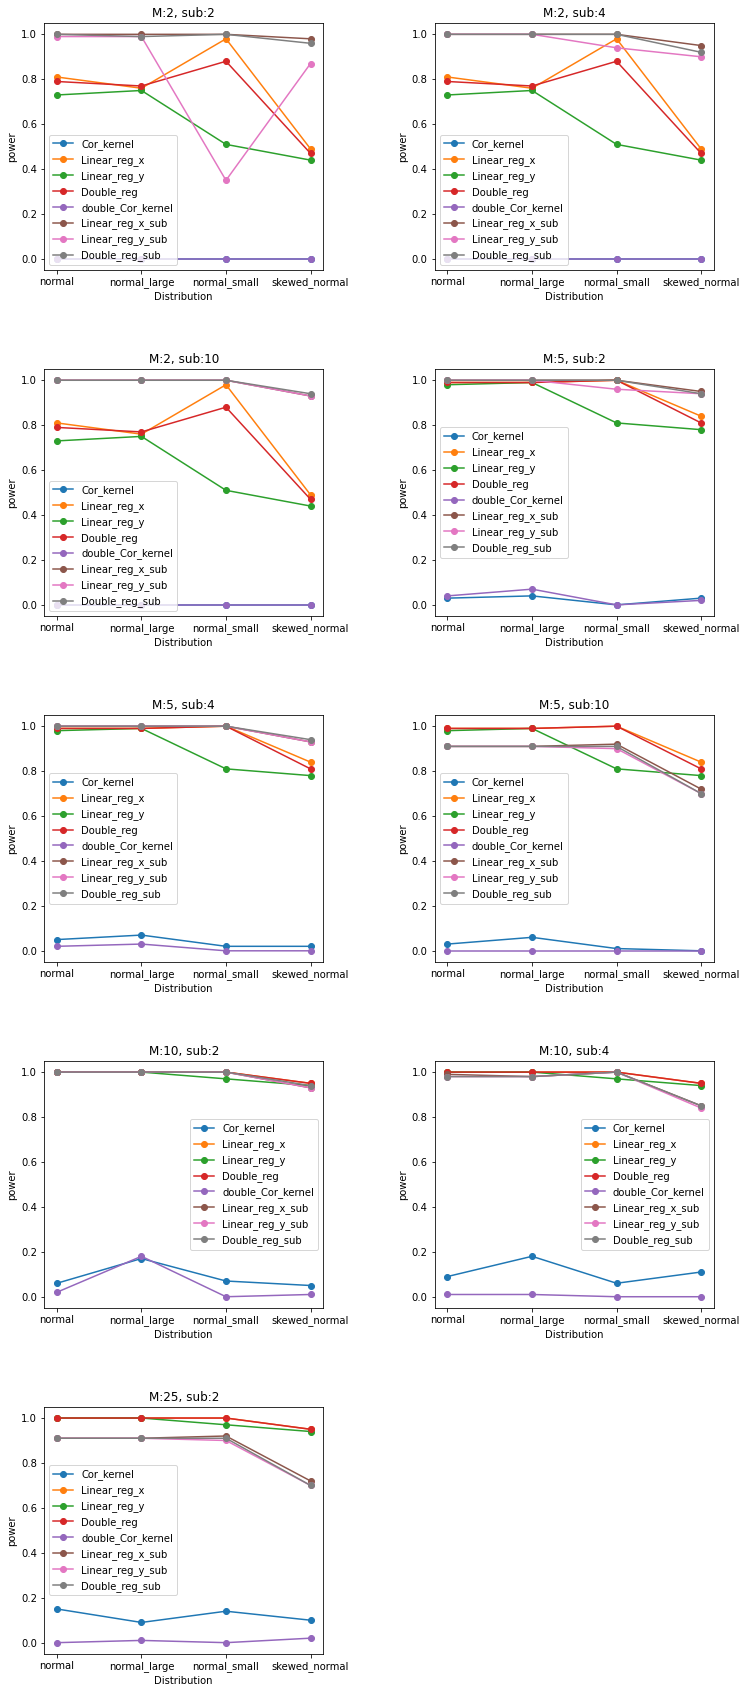

In [3]:
Ms = [2, 5, 10, 25]
plt.figure(figsize=(12,30))
plt.subplots_adjust(wspace=.4, hspace=.4)
t = 0
for m in range(len(Ms)):
    if Ms[m] <= 5:
        subs = [2, 4, 10]
    elif Ms[m] < 25:
        subs = [2, 4]
    else:
        subs=[2]
    for sub in subs:
        t += 1
        plt.subplot(5, 2, t)
        result = pd.read_csv("./results/result_sub/result_h1_M_"+str(Ms[m])+"_sub_"+str(sub)+".csv", index_col=0)
        plt.plot(result.T, '-o')
        plt.xlabel("Distribution")
        plt.ylabel("power")
        plt.legend(result.index)
        plt.title("M:"+str(Ms[m])+", sub:"+str(sub))
plt.show()

## Gains
 - When $f_x$ is linear and $f_y$ is non-linear in $Z$ (Setting 1,2,5,6,7,8):
   - Linear_reg_y performs better than Linear_reg_x? (effective type-I error control but with lower power)
   - Linear_reg_x performs very bad under normal_small
 - When $f_x$ is non-linear and $f_y$ is non-linear in $Z$ (Setting 4):
   - All methods perform bad (very low power)
 - When $f_x$ is linear and $f_y$ is linear in $Z$ (Setting 3,9):
   - Linear_reg_x performs bad?

## Setting 1

$f_x(Z) = Z$, $f_y(Z) = Z+3Z^2+2$.

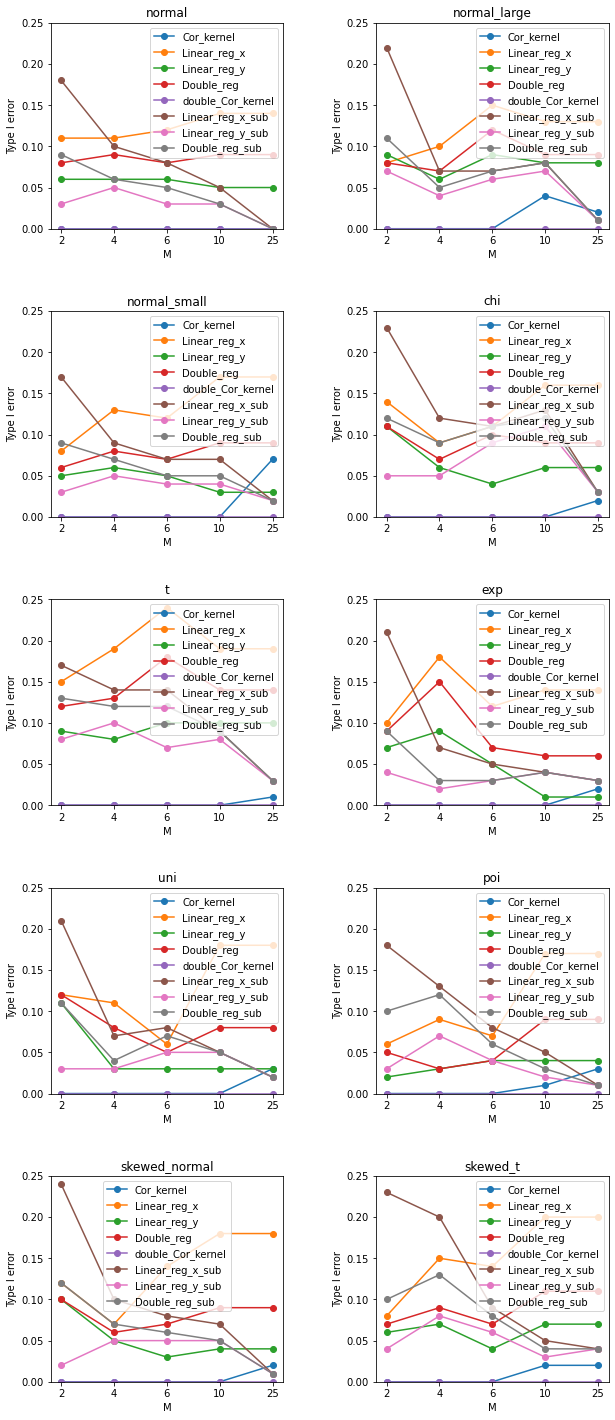

In [16]:
types = ["normal", "normal_large", "normal_small", "chi", "t", "exp", "uni", 
        "poi", "skewed_normal", "skewed_t"]
plt.figure(figsize=(10,25))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(5, 2, t+1)
    result = pd.read_csv("./results/result_sub/result_one_sub_4_h0_"+types[t]+".csv", index_col=0)
    result = result.iloc[:8,]
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    plt.ylabel("Type I error")
    plt.ylim((0, 0.25))
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

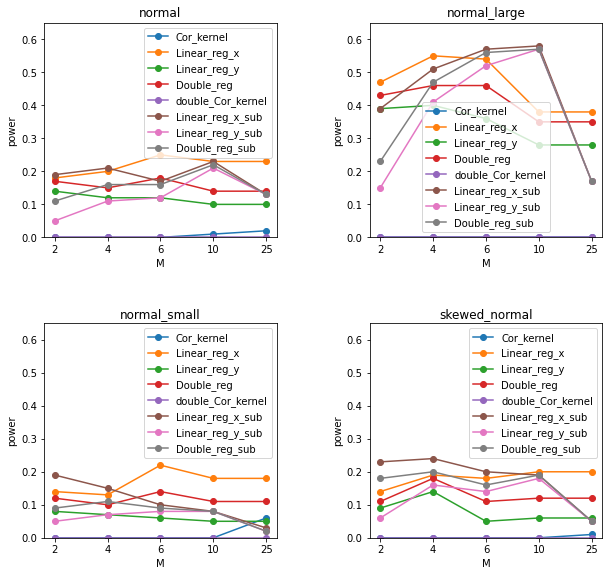

In [19]:
types = ["normal", "normal_large", "normal_small", "skewed_normal"]
plt.figure(figsize=(10,15))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(3, 2, t+1)
    result = pd.read_csv("./results/result_sub/result_one_sub_4_h1_"+types[t]+".csv", index_col=0)
    result = result.iloc[0:8,]
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    plt.ylabel("power")
    plt.legend(result.index)
    plt.ylim((0, 0.65))
    plt.title(types[t])
plt.show()

## Setting 2

$f_x(Z) = Z$, $f_y(Z) = \log(Z+1)-2$.

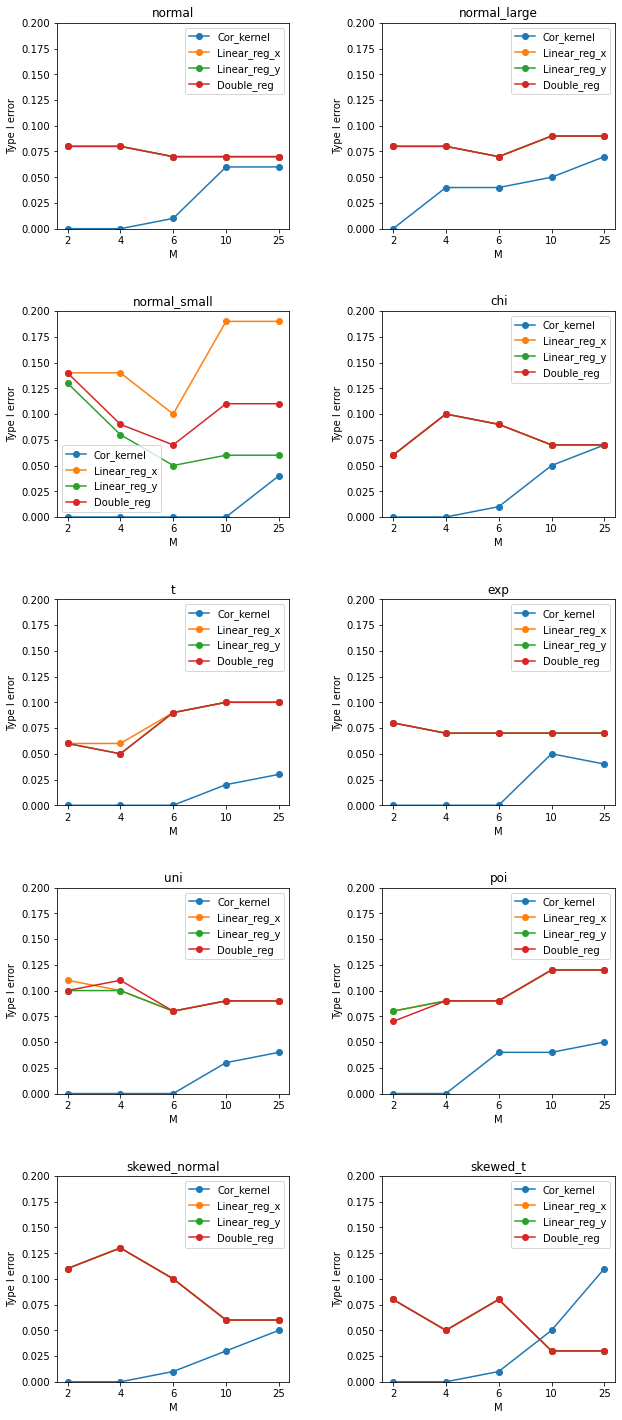

In [7]:
types = ["normal", "normal_large", "normal_small", "chi", "t", "exp", "uni", 
        "poi", "skewed_normal", "skewed_t"]
plt.figure(figsize=(10,25))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(5, 2, t+1)
    result = pd.read_csv("./results/result_sub/result_two_sub_4_h0_"+types[t]+".csv", index_col=0)
    result = result.iloc[0:4,]
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    plt.ylabel("Type I error")
    plt.legend(result.index)
    plt.ylim((0, 0.2))
    plt.title(types[t])
plt.show()

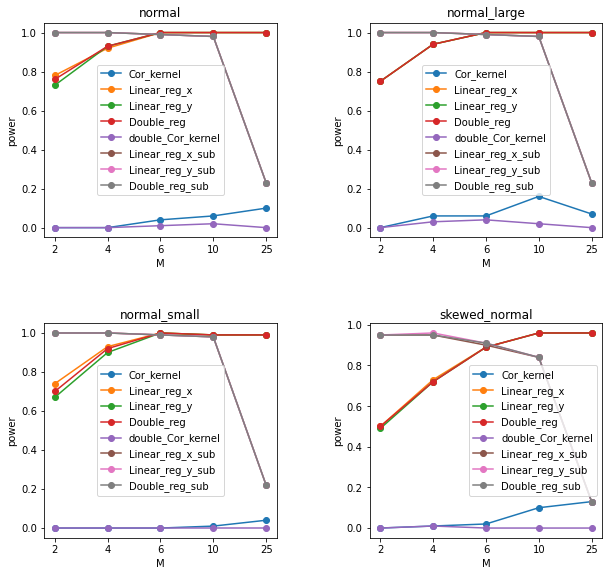

In [134]:
types = ["normal", "normal_large", "normal_small", "skewed_normal"]
plt.figure(figsize=(10,15))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(3, 2, t+1)
    result = pd.read_csv("./results/result_sub/result_two_sub_4_h1_"+types[t]+".csv", index_col=0)
    result = result.iloc[0:8,]
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

## Setting 3

$f_x(Z) = Z$, $f_y(Z) = 3Z$.

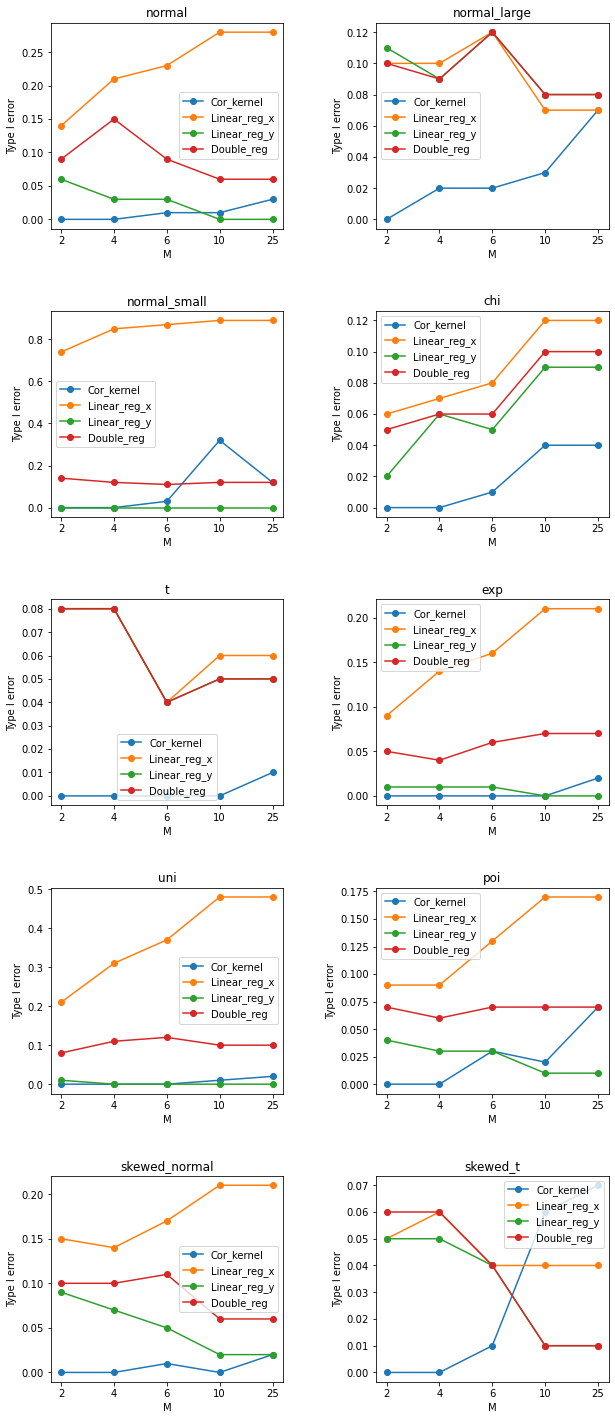

In [22]:
types = ["normal", "normal_large", "normal_small", "chi", "t", "exp", "uni", 
        "poi", "skewed_normal", "skewed_t"]
plt.figure(figsize=(10,25))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(5, 2, t+1)
    result = pd.read_csv("./results/result_sub/result_three_sub_2_h0_"+types[t]+".csv", index_col=0)
    result = result.iloc[0:4,]
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    plt.ylabel("Type I error")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

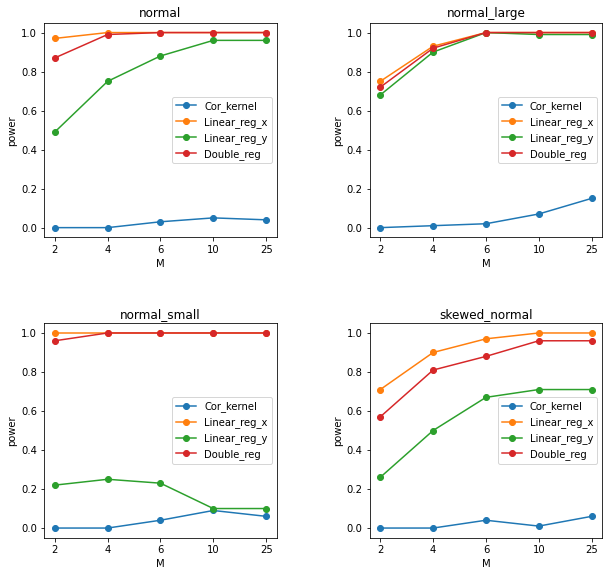

In [23]:
types = ["normal", "normal_large", "normal_small", "skewed_normal"]
plt.figure(figsize=(10,15))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(3, 2, t+1)
    result = pd.read_csv("./results/result_sub/result_three_sub_2_h1_"+types[t]+".csv", index_col=0)
    result = result.iloc[0:4,]
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

## Setting 4

$f_x(Z) = Z+3Z^2+2$, $f_y(Z) = \log(Z+1)-2$.

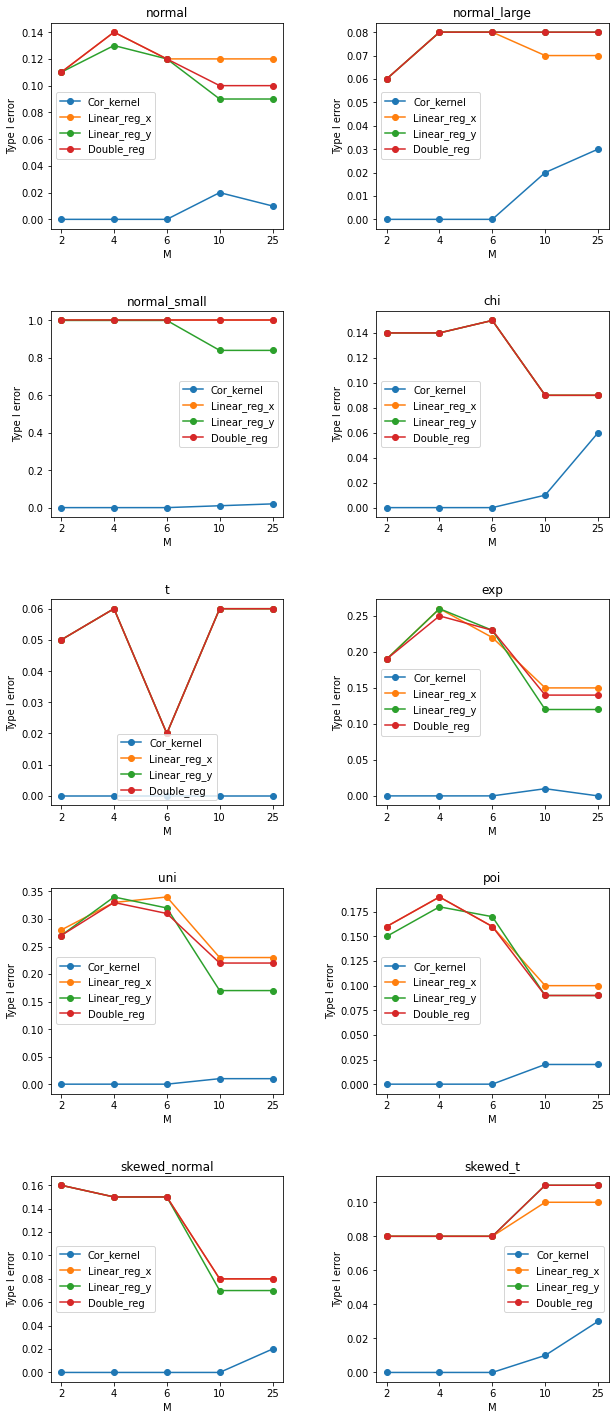

In [10]:
types = ["normal", "normal_large", "normal_small", "chi", "t", "exp", "uni", 
        "poi", "skewed_normal", "skewed_t"]
plt.figure(figsize=(10,25))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(5, 2, t+1)
    result = pd.read_csv("./results/result_sub/result_four_sub_4_h0_"+types[t]+".csv", index_col=0)
    result = result.iloc[0:4,]
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    plt.ylabel("Type I error")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

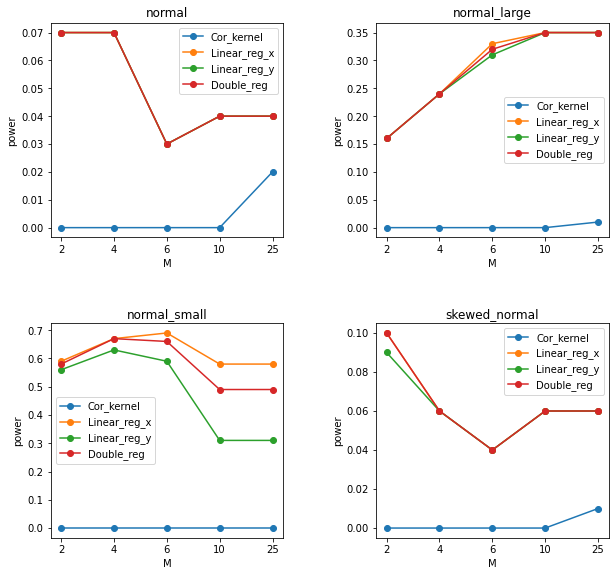

In [125]:
types = ["normal", "normal_large", "normal_small", "skewed_normal"]
plt.figure(figsize=(10,15))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(3, 2, t+1)
    result = pd.read_csv("./results/result_sub/result_four_sub_4_h1_"+types[t]+".csv", index_col=0)
    result = result.iloc[0:4,]
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

## Setting 5

$f_x(Z) = Z$, $f_y(Z) = \log(Z+1)+2$.

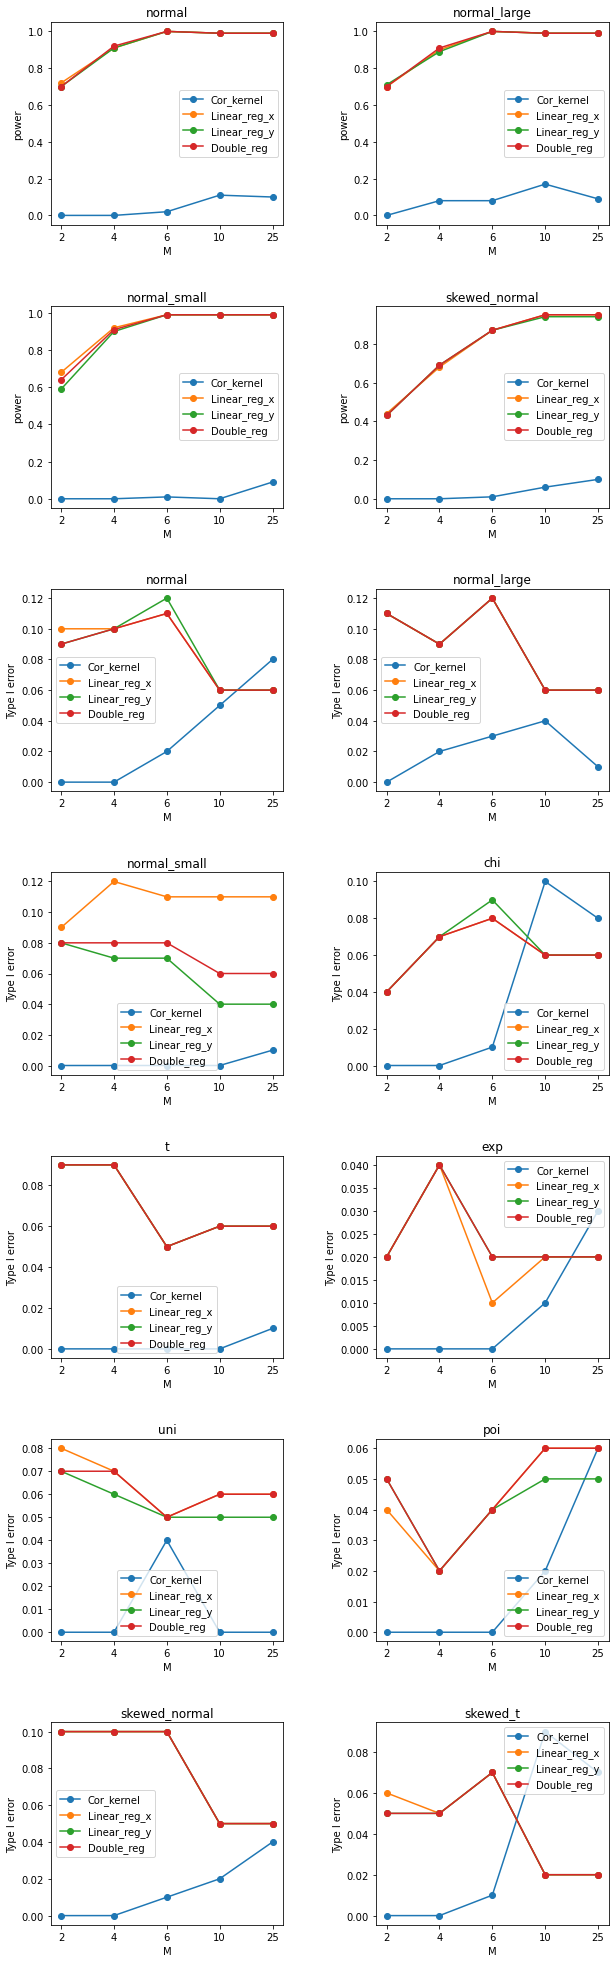

In [3]:
types = ["normal", "normal_large", "normal_small", "skewed_normal",
    "normal", "normal_large", "normal_small", "chi", "t", "exp", "uni", 
    "poi", "skewed_normal", "skewed_t"]
hs =  ["h1"] * 4 + ["h0"] * 10
plt.figure(figsize=(10,35))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(7, 2, t+1)
    result = pd.read_csv("./results/result_sub/result_five_sub_2_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    result = result.iloc[0:4,]
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

## Setting 6

$f_x(Z) = Z$, $f_y(Z) = Z+2Z^2+Z^3$.

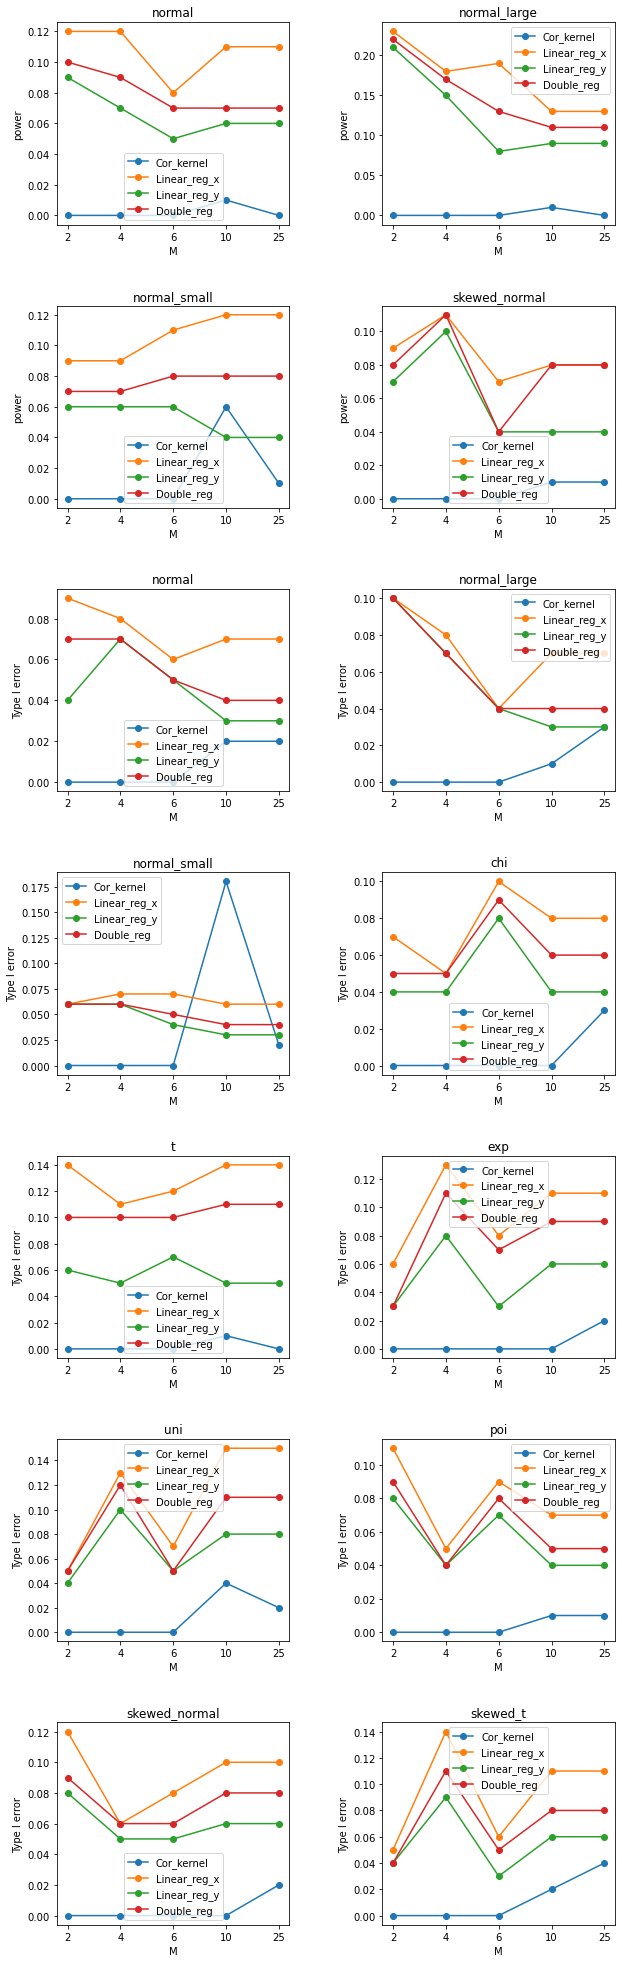

In [25]:
types = ["normal", "normal_large", "normal_small", "skewed_normal",
    "normal", "normal_large", "normal_small", "chi", "t", "exp", "uni", 
    "poi", "skewed_normal", "skewed_t"]
hs =  ["h1"] * 4 + ["h0"] * 10
plt.figure(figsize=(10,35))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(7, 2, t+1)
    result = pd.read_csv("./results/result_sub/result_six_sub_2_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    result = result.iloc[0:4,]
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

## Setting 7

$f_x(Z) = Z$, $f_y(Z) = \frac{5}{Z}$.

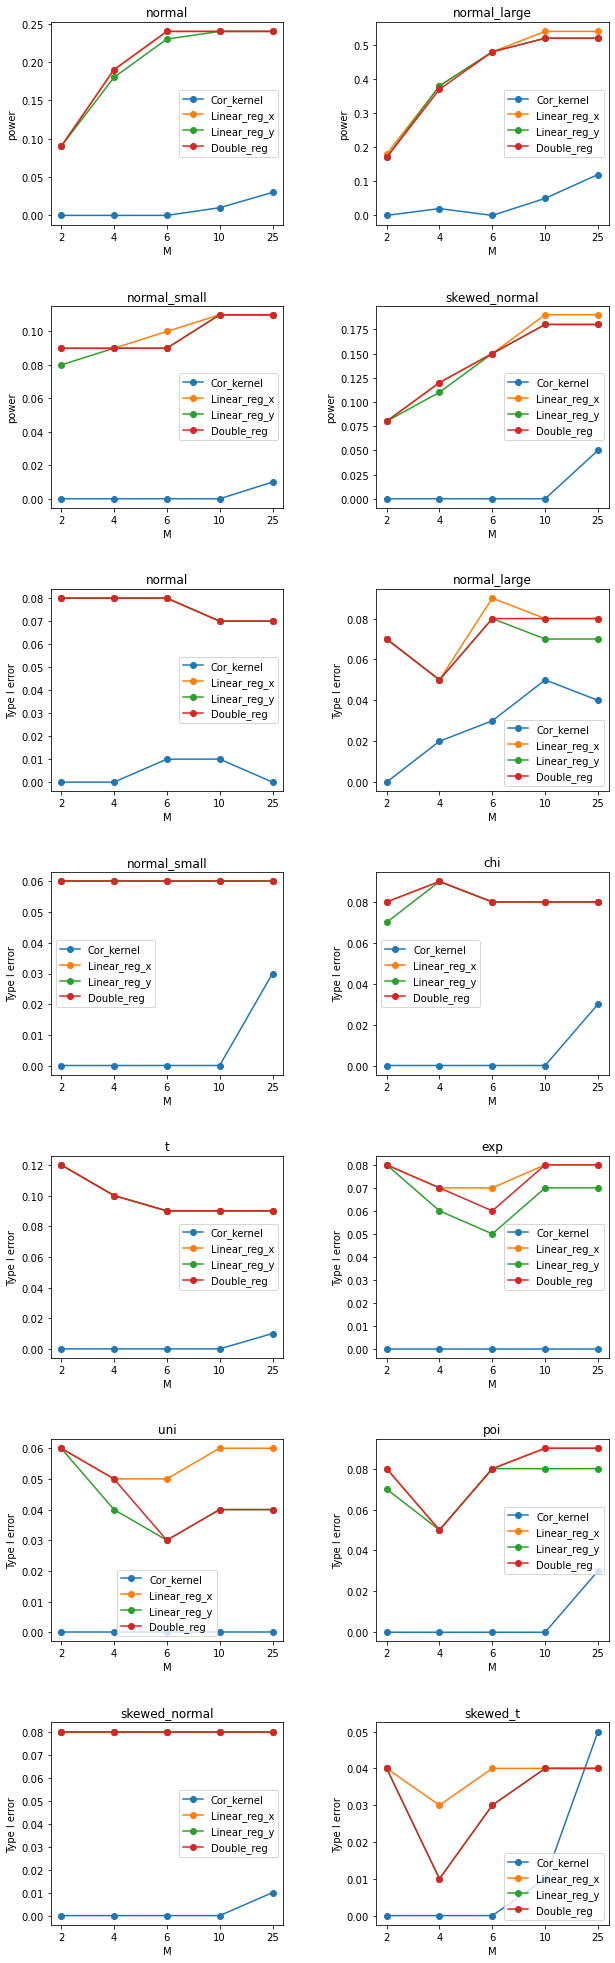

In [26]:
types = ["normal", "normal_large", "normal_small", "skewed_normal",
    "normal", "normal_large", "normal_small", "chi", "t", "exp", "uni", 
    "poi", "skewed_normal", "skewed_t"]
hs =  ["h1"] * 4 + ["h0"] * 10
plt.figure(figsize=(10,35))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(7, 2, t+1)
    result = pd.read_csv("./results/result_sub/result_seven_sub_2_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    result = result.iloc[0:4,]
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

## Setting 8

$f_x(Z) = Z$, $f_y(Z) = 7+\sqrt{Z}$.

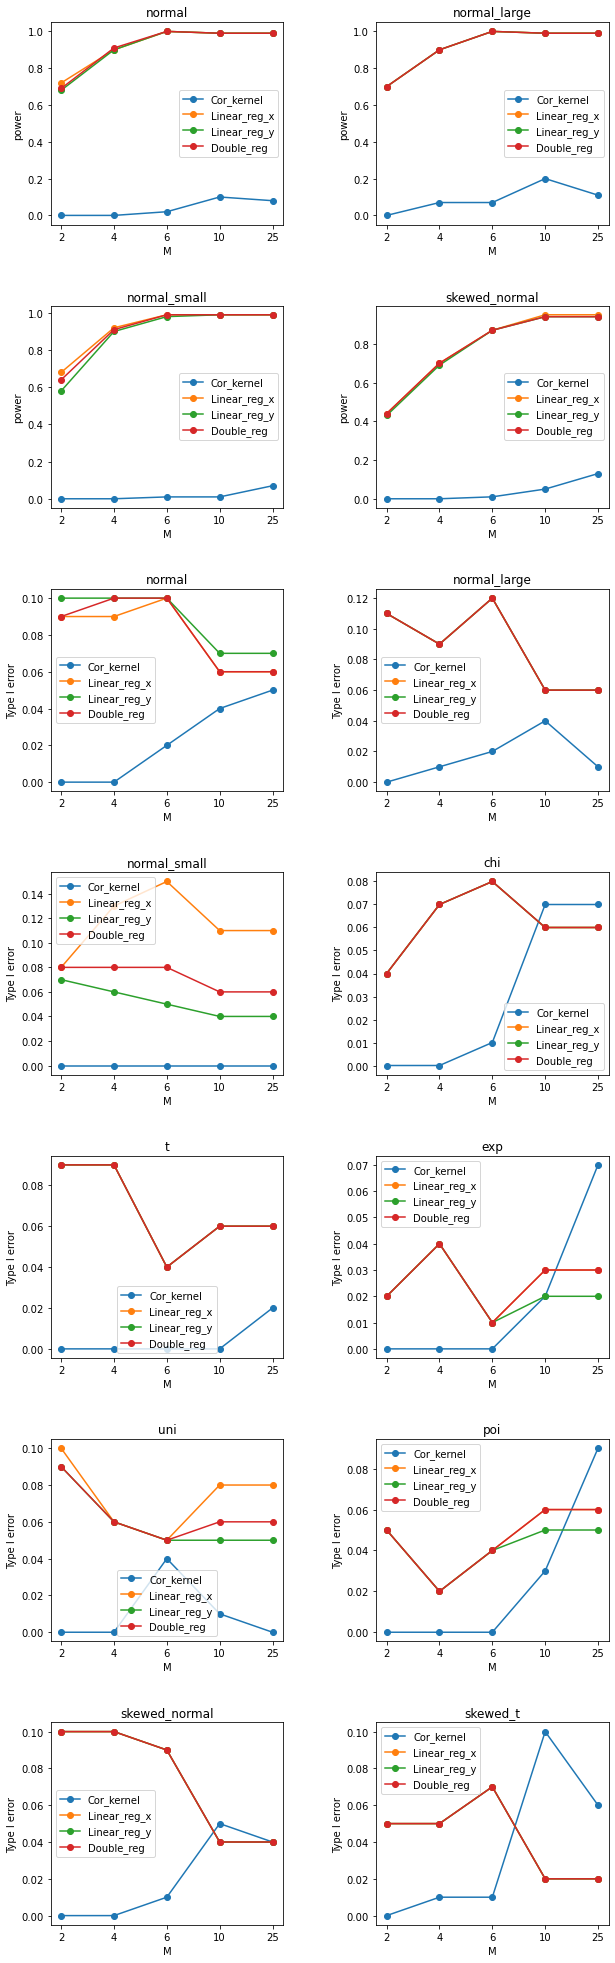

In [28]:
types = ["normal", "normal_large", "normal_small", "skewed_normal",
    "normal", "normal_large", "normal_small", "chi", "t", "exp", "uni", 
    "poi", "skewed_normal", "skewed_t"]
hs =  ["h1"] * 4 + ["h0"] * 10
plt.figure(figsize=(10,35))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(7, 2, t+1)
    result = pd.read_csv("./results/result_sub/result_eight_sub_2_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    result = result.iloc[0:4,]
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

## Setting 9

$f_x(Z) = 3Z$, $f_y(Z) = -2Z$.

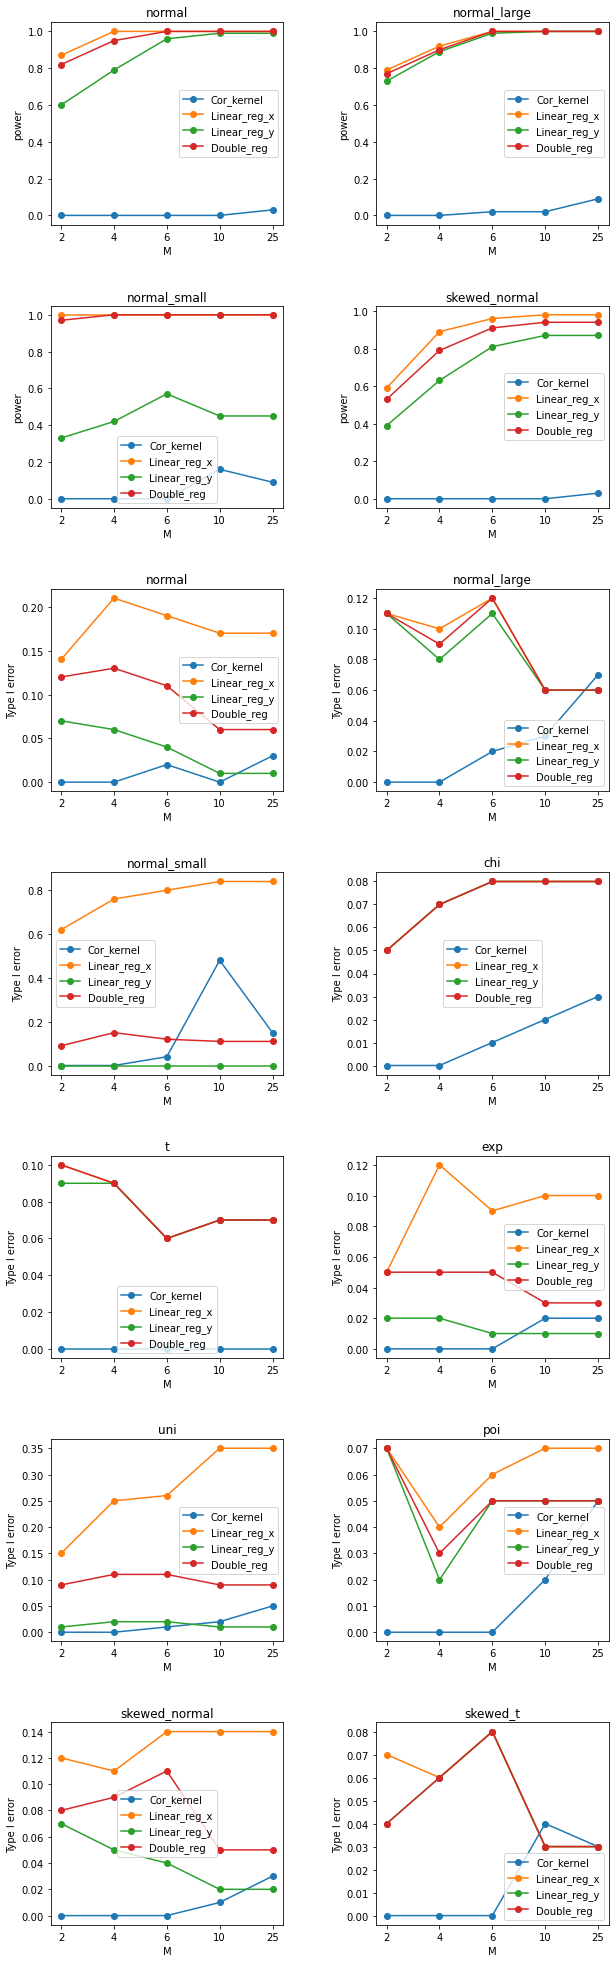

In [30]:
types = ["normal", "normal_large", "normal_small", "skewed_normal",
    "normal", "normal_large", "normal_small", "chi", "t", "exp", "uni", 
    "poi", "skewed_normal", "skewed_t"]
hs =  ["h1"] * 4 + ["h0"] * 10
plt.figure(figsize=(10,35))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(7, 2, t+1)
    result = pd.read_csv("./results/result_sub/result_nine_sub_2_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    result = result.iloc[0:4,]
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()